In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv("../data/u.data", sep="\t", names = ["userId","movieId","rating","timestamp"])
movies = pd.read_csv("../data/u.item", sep="|", encoding = "latin-1", header = None, usecols = [0,1], names=["movieId","title"])

In [4]:
print("Size of ratings:", ratings.shape)
print("Size of movies:", movies.shape)
print(ratings.head())
print(movies.head())


Size of ratings: (100000, 4)
Size of movies: (1682, 2)
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596
   movieId              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


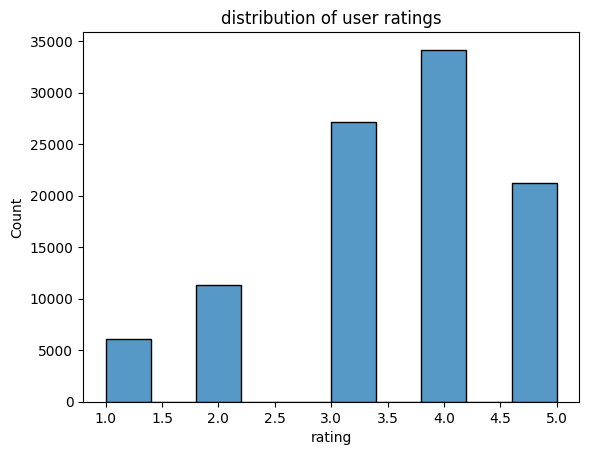

In [5]:
sns.histplot(ratings["rating"],bins = 10)
plt.title("distribution of user ratings")
plt.show()

In [8]:
ratings_count = ratings.groupby("movieId")["rating"].count().reset_index()
ratings_count = ratings_count.merge(movies, on = "movieId")
ratings_count = ratings_count.sort_values("rating", ascending = False).head(10)
print("Top-10")
print(ratings_count[["title","rating"]])

Top-10
                             title  rating
49                Star Wars (1977)     583
257                 Contact (1997)     509
99                    Fargo (1996)     508
180      Return of the Jedi (1983)     507
293               Liar Liar (1997)     485
285    English Patient, The (1996)     481
287                  Scream (1996)     478
0                 Toy Story (1995)     452
299           Air Force One (1997)     431
120  Independence Day (ID4) (1996)     429


In [10]:
ratings_stats = ratings.groupby("movieId")["rating"].agg(["mean", "count"]).reset_index()
ratings_stats = ratings_stats[ratings_stats["count"]>=100]
ratings_stats = ratings_stats.merge(movies, on = "movieId")
top_rated = ratings_stats.sort_values("mean", ascending=False).head(10)
print("Top-10 on avg (>100):")
print(top_rated[["title", "mean", "count"]])

Top-10 on avg (>100):
                                title      mean  count
232             Close Shave, A (1995)  4.491071    112
202           Schindler's List (1993)  4.466443    298
91         Wrong Trousers, The (1993)  4.466102    118
262                 Casablanca (1942)  4.456790    243
29   Shawshank Redemption, The (1994)  4.445230    283
293                Rear Window (1954)  4.387560    209
7          Usual Suspects, The (1995)  4.385768    267
22                   Star Wars (1977)  4.358491    583
99                12 Angry Men (1957)  4.344000    125
72                Citizen Kane (1941)  4.292929    198


In [11]:
user_activity = ratings.groupby("userId")["rating"].count().reset_index()
user_activity = user_activity.sort_values("rating", ascending = False).head(10)

print("Top 10 active users")
print(user_activity)

Top 10 active users
     userId  rating
404     405     737
654     655     685
12       13     636
449     450     540
275     276     518
415     416     493
536     537     490
302     303     484
233     234     480
392     393     448


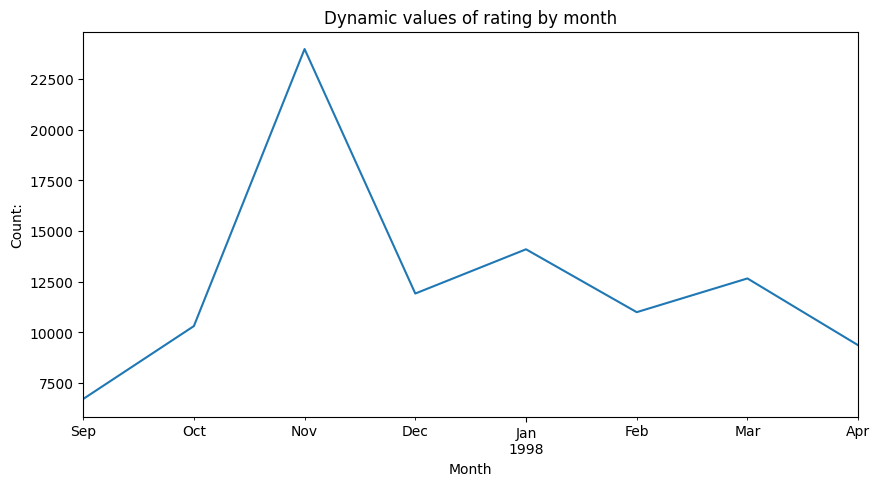

In [14]:
ratings["date"] = pd.to_datetime(ratings["timestamp"], unit = "s")
ratings_by_month = ratings.groupby(ratings["date"].dt.to_period("M"))["rating"].count()

ratings_by_month.plot(kind = "line", figsize = (10,5))
plt.title("Dynamic values of rating by month")
plt.xlabel("Month")
plt.ylabel("Count:")
plt.show()